 1. Step-by-step CNN Code (in Python with TensorFlow/Keras)

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load dataset (CIFAR-10: 60,000 images in 10 classes)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# We normalize pixel values to between 0 and 1 to 

#Makes training more stable.

#Helps the network learn faster and more effectively.

#Reduces the risk of exploding/vanishing gradients.

#Ensures consistency across different datasets or models.

2. CNN Model Architecture with Explanations

In [7]:
# 2. Create the CNN model
model = models.Sequential()

# --- Convolutional Layer 1 ---
# Applies 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# --- Pooling Layer 1 ---
model.add(layers.MaxPooling2D((2, 2)))

# --- Convolutional Layer 2 ---
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# --- Pooling Layer 2 ---
model.add(layers.MaxPooling2D((2, 2)))

# --- Convolutional Layer 3 ---
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# --- Flattening the 3D output to 1D ---
model.add(layers.Flatten())

# --- Fully Connected Layer ---
model.add(layers.Dense(64, activation='relu'))

# --- Output Layer: 10 neurons for 10 classes ---
#model.add(layers.Dense(10))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\Derek Egenti\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Concepts Explained


🔹 Filter/Kernel:
A small matrix (like 3x3 or 5x5) that slides over the input image to extract features like edges, textures, etc. Think of it as a detector.

🔹 Stride:
The number of pixels the filter moves at each step. A stride of 1 means move one pixel at a time.

🔹 Padding:
Used to control the spatial size of the output. If you want to keep the size the same as input, you use 'same' padding (adds zeros around the border).

🔹 Convolutional Layer:
Applies multiple filters across the image to produce feature maps, each highlighting specific features.

🔹 Pooling Layer:
Reduces the dimensions (downsampling) while keeping the most important info. Common is MaxPooling, which takes the max value in a window (e.g., 2x2).

🔹 Abstraction:
As the network goes deeper, it learns increasingly abstract features. Early layers might detect edges, later ones can detect complex patterns like faces or objects.

🔹 Fully Connected Layers:
Standard neural network layers that interpret the high-level features and map them to class scores.

🔹 Output Layer:
Final layer that outputs class scores (logits). Usually followed by Softmax for classification to interpret as probabilities.

🔹 Activation Function:
An activation function is a mathematical function applied after each neuron (or filter output) to decide whether it should be "activated" (i.e., passed forward) or not.

Uses
 Introduce Non-Linearity
Without activation functions, neural networks are just linear transformations, no matter how many layers you stack.

Real-world data is non-linear (images, speech, language), so we need non-linear activation functions to learn complex patterns.

 Control Information Flow
They help the network decide which information is important.

Some activations zero-out or squash less useful signals (e.g., ReLU zeros out negative values).

 Enable Learning of Complex Representations
They help the network build hierarchical abstractions, e.g.:

Early layers: detect edges

Mid layers: detect shapes

Late layers: detect faces or objects

4. Training the CNN

Training Steps:
Forward pass: Input image flows through the layers, generating predictions.

Loss calculation: Difference between predicted and actual labels.

Backpropagation: Gradients are calculated and used to update weights.

Optimizer: Adam (Adaptive Moment Estimation) updates weights efficiently.

In [10]:
# Import and Define the optimizer

from keras.optimizers import RMSprop,Adam

In [12]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [13]:
# 3. Compile the model
model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


c:\Users\Derek Egenti\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.3503 - loss: 1.7669 - val_accuracy: 0.5534 - val_loss: 1.2647
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5771 - loss: 1.1960 - val_accuracy: 0.6048 - val_loss: 1.1265
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6548 - loss: 0.9844 - val_accuracy: 0.6616 - val_loss: 0.9932
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7008 - loss: 0.8612 - val_accuracy: 0.6722 - val_loss: 0.9602
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7298 - loss: 0.7790 - val_accuracy: 0.5943 - val_loss: 1.2609
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7576 - loss: 0.7073 - val_accuracy: 0.6917 - val_loss: 0.9250
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7770 - loss: 0.6424 - val_accuracy: 0.6938 - val_loss: 0.9192
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7940 - loss: 0.59

5. Testing the CNN

This checks how well the trained model generalizes to unseen data.

In [14]:
# 5. Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - 8ms/step - accuracy: 0.7078 - loss: 0.9647

Test accuracy: 0.7077999711036682


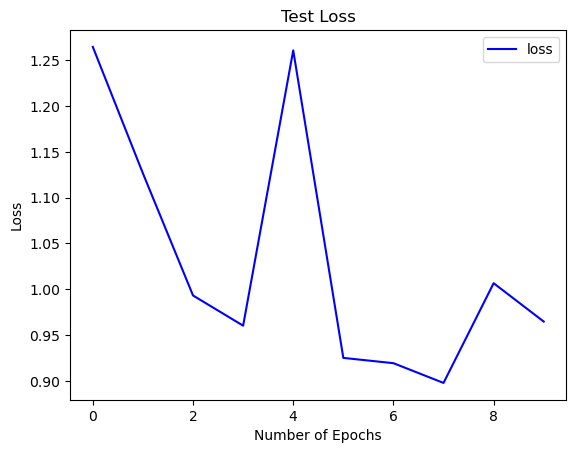

In [15]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

6. Predicting New Images

To use the model for new images